In [1]:
import pandas as pd
from datetime import datetime

In [580]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ProjectTweets.csv",header = None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
columns_names=['index','id','date','flag','user','text']

In [5]:
df.columns = columns_names

In [6]:
# remove PDT 
df['date'] = df['date'].str.replace('PDT', '')

In [7]:
# time format
date_format = '%a %b %d %H:%M:%S %Y'

In [8]:
# column in object 
df['date'] = pd.to_datetime(df['date'], format=date_format)

In [9]:
# date objects
print(df['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1600000, dtype: datetime64[ns]


In [10]:
df['date'].min()

Timestamp('2009-04-06 22:19:45')

In [11]:
df['date'].max()

Timestamp('2009-06-25 10:28:31')

In [12]:
df['week'] = df['date'].dt.strftime('%U')  # week



In [13]:
df['month'] = df['date'].dt.strftime('%B')  # month

In [14]:
df['day'] = df['date'].dt.strftime('%A')  # day

In [15]:
df['day_num'] = df['date'].dt.dayofyear


In [16]:
df.head()

,index,id,date,flag,user,text,week,month,day,day_num
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96


In [17]:
import nltk
from nltk.tokenize import word_tokenize

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
english_stopwords = set(stopwords.words('english'))

def clean_data(text, stopwords_set):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords_set]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


In [25]:
df['cleaned_text'] = df['text'].apply(clean_data, args=(english_stopwords,))


# sentiment analysis with vader

In [21]:
import nltk

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['cleaned_text']:
    pol_score = sia.polarity_scores(line)
    pol_score['cleaned_text'] = line
    results.append(pol_score)

In [27]:
df1 = pd.DataFrame.from_records(results)
df1.head()

,neg,neu,pos,compound,cleaned_text
0,0.224,0.776,0.000,-0.3818,switchfoot http awww bummer shoulda got david ...
1,0.441,0.559,0.000,-0.7269,upset ca update facebook texting might cry res...
2,0.000,0.738,0.262,0.4939,kenichan dived many time ball managed save res...
3,0.450,0.300,0.250,-0.2500,whole body feel itchy like fire
4,0.444,0.556,0.000,-0.4939,nationwideclass behaving mad ca see


In [28]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,cleaned_text,label
0,0.224,0.776,0.000,-0.3818,switchfoot http awww bummer shoulda got david ...,-1
1,0.441,0.559,0.000,-0.7269,upset ca update facebook texting might cry res...,-1
2,0.000,0.738,0.262,0.4939,kenichan dived many time ball managed save res...,1
3,0.450,0.300,0.250,-0.2500,whole body feel itchy like fire,-1
4,0.444,0.556,0.000,-0.4939,nationwideclass behaving mad ca see,-1


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

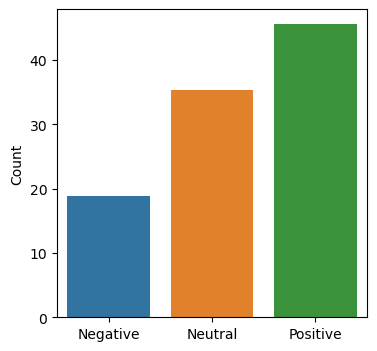

In [30]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [31]:
merged_df = pd.merge(df, df1, on="cleaned_text", how="inner")

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13836318 entries, 0 to 13836317
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   index         int64         
 1   id            int64         
 2   date          datetime64[ns]
 3   flag          object        
 4   user          object        
 5   text          object        
 6   week          object        
 7   month         object        
 8   day           object        
 9   day_num       int64         
 10  cleaned_text  object        
 11  neg           float64       
 12  neu           float64       
 13  pos           float64       
 14  compound      float64       
 15  label         int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(7)
memory usage: 1.8+ GB


In [33]:
merged_df['solo_data'] = pd.to_datetime(merged_df['date'])

In [34]:
merged_df['solo_data']= merged_df['solo_data'].dt.date

# sentiment analysis with textblob

In [35]:
from textblob import TextBlob

In [36]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    return float(sentiment_score)

In [37]:
df['sentiment_score'] = df['cleaned_text'].apply(analyze_sentiment)

In [38]:
df['label_blob'] = 0
df.loc[df['sentiment_score'] > 0.2, 'label_blob'] = 1
df.loc[df['sentiment_score'] < -0.2, 'label_blob'] = -1
df.head()

,index,id,date,flag,user,text,week,month,day,day_num,cleaned_text,sentiment_score,label_blob
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96,switchfoot http awww bummer shoulda got david ...,0.200,0
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96,upset ca update facebook texting might cry res...,0.000,0
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96,kenichan dived many time ball managed save res...,0.500,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96,whole body feel itchy like fire,0.200,0
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96,nationwideclass behaving mad ca see,-0.625,-1


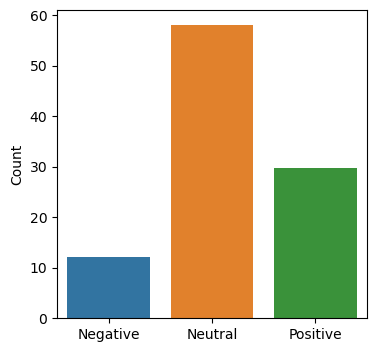

In [39]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label_blob.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

# forecasting models data preparation

In [88]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [89]:
merged_df['solo_data'] = merged_df['date'].dt.date

In [90]:
grouped_df = merged_df.groupby('solo_data')['compound'].mean().reset_index()


In [91]:
grouped_df = grouped_df.dropna()

In [92]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   solo_data  48 non-null     object 
 1   compound   48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [93]:
grouped_df['solo_data'] = pd.to_datetime(grouped_df['solo_data'], format='%Y-%m-%d')

In [94]:
grouped_df['day_num'] = grouped_df['solo_data'].dt.dayofyear

In [95]:
grouped_df1 = grouped_df[grouped_df['solo_data'].dt.month >= 5]

In [96]:
plt.figure(figsize=(10, 6))  # chart


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

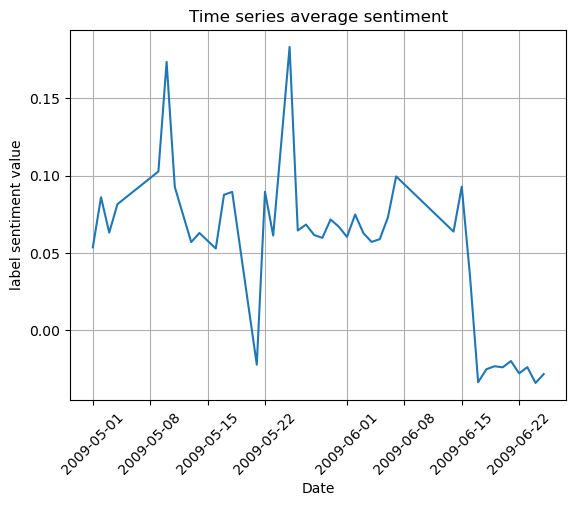

In [97]:
plt.plot(grouped_df1['solo_data'], grouped_df1['compound'])  
plt.title('Time series average sentiment')  
plt.xlabel('Date')  
plt.ylabel('label sentiment value')  
plt.grid(True) 
plt.xticks(rotation=45)
plt.show()  

In [98]:
from statsmodels.tsa.stattools import adfuller

# test ADF
result = adfuller(grouped_df1['compound'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]






time series is not stationary (H1 accepted)


In [108]:
if p_value < 0.05:
    print("time series is stationary (Ho rejected)")
else:
    print("time series is not stationary (H1 accepted)")


time series is not stationary (H1 accepted)


# investigation on negative peak 21st of May¶

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [40]:
twenty_first_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-21'))]

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/2057111120.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  twenty_first_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-21'))]


In [62]:
twenty_first_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33004 entries, 575494 to 13010863
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         33004 non-null  int64         
 1   id            33004 non-null  int64         
 2   date          33004 non-null  datetime64[ns]
 3   flag          33004 non-null  object        
 4   user          33004 non-null  object        
 5   text          33004 non-null  object        
 6   week          33004 non-null  object        
 7   month         33004 non-null  object        
 8   day           33004 non-null  object        
 9   day_num       33004 non-null  int64         
 10  cleaned_text  33004 non-null  object        
 11  neg           33004 non-null  float64       
 12  neu           33004 non-null  float64       
 13  pos           33004 non-null  float64       
 14  compound      33004 non-null  float64       
 15  label         33004 non-null

In [52]:
def clean2(text):
    
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [50]:
twenty_first_may['text']=twenty_first_may['text'].astype('string')

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/1369968564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_first_may['text']=twenty_first_may['text'].astype('string')


In [53]:
twenty_first_may['text'] = twenty_first_may['text'].apply(clean2)

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/1742615297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_first_may['text'] = twenty_first_may['text'].apply(clean2)


In [63]:

vec = CountVectorizer()  #  CountVectorizer
X = vec.fit_transform([' '.join(text) for text in twenty_first_may['text']])
df_words_f = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())



In [64]:
# 10 most frequent words
word_sum = df_words.sum().sort_values(ascending=False)
print(word_sum.head(10))

sorry       2333
died        2313
isplayer    2310
thank       1228
tired        774
bed          233
nothing      226
good         213
ca           210
going        205
dtype: int64


In [81]:
df_filtrato = twenty_first_may[twenty_first_may['cleaned_text'].str.contains('died', case=False, na=False)]

In [82]:
df_filtrato['cleaned_text'].unique()

array(['isplayer died sorry',
       'found friend brother died funeral tuesday another friend lost mom mother day',
       'rocky start summer cat max died',
       'supersweetmack oh sorry thats kind fault show ended super early amp take back car amp phone died'],
      dtype=object)

# investigation on positive peak 21st of May

In [65]:
twenty_fifth_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-25'))]

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/4066597930.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  twenty_fifth_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-25'))]


In [66]:
twenty_fifth_may['text']=twenty_fifth_may['text'].astype('string')

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/1856623546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_fifth_may['text']=twenty_fifth_may['text'].astype('string')


In [69]:
twenty_fifth_may['text'] = twenty_fifth_may['text'].apply(clean2)

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/3468761305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_fifth_may['text'] = twenty_fifth_may['text'].apply(clean2)


In [70]:
# CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform([' '.join(text) for text in twenty_fifth_may['text']])
df_words = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())



In [72]:
word_sum = df_words.sum().sort_values(ascending=False)
print(word_sum.head(10))

bored      247
welcome    215
time        91
good        90
like        87
follow      84
laugh       83
simple      81
online      32
back        17
dtype: int64


In [78]:
df_filtrato = twenty_fifth_may[twenty_fifth_may['cleaned_text'].str.contains('welcome', case=False, na=False)]

In [80]:
df_filtrato['cleaned_text'].unique()

array(['pathfindersar welcome anything help sock thing im paranoid confess',
       'welcome'], dtype=object)

# Models

# fill null values in dates column

In [109]:
import numpy as np

In [111]:
grouped_df1.reset_index(inplace=True)

In [112]:
dates = np.array(grouped_df1['solo_data'])  


In [113]:
values = np.array(grouped_df1['compound'])  

In [114]:
numeric_dates = np.arange(len(dates))


In [116]:
date_min = min(grouped_df1['solo_data'])
date_max = max(grouped_df1['solo_data'])

In [117]:
list_dates = grouped_df1['solo_data'].tolist()

In [118]:
from datetime import datetime, timedelta

delta = date_max - date_min

# Crea una lista di date nel periodo
date_list = [date_min + timedelta(days=i) for i in range(delta.days + 1)]

# Stampa la lista di date
print(date_list)


[Timestamp('2009-05-01 00:00:00'), Timestamp('2009-05-02 00:00:00'), Timestamp('2009-05-03 00:00:00'), Timestamp('2009-05-04 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-09 00:00:00'), Timestamp('2009-05-10 00:00:00'), Timestamp('2009-05-11 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-05-13 00:00:00'), Timestamp('2009-05-14 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-05-16 00:00:00'), Timestamp('2009-05-17 00:00:00'), Timestamp('2009-05-18 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-05-21 00:00:00'), Timestamp('2009-05-22 00:00:00'), Timestamp('2009-05-23 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-25 00:00:00'), Timestamp('2009-05-26 00:00:00'), Timestamp('2009-05-27 00:00:00'), Timestamp('2009-05-28 00:00:00'), Timestamp('2009-05-29 00:00:00'), Timestamp('20

In [119]:
list_dates

[Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-05-02 00:00:00'),
 Timestamp('2009-05-03 00:00:00'),
 Timestamp('2009-05-04 00:00:00'),
 Timestamp('2009-05-09 00:00:00'),
 Timestamp('2009-05-10 00:00:00'),
 Timestamp('2009-05-11 00:00:00'),
 Timestamp('2009-05-13 00:00:00'),
 Timestamp('2009-05-14 00:00:00'),
 Timestamp('2009-05-16 00:00:00'),
 Timestamp('2009-05-17 00:00:00'),
 Timestamp('2009-05-18 00:00:00'),
 Timestamp('2009-05-21 00:00:00'),
 Timestamp('2009-05-22 00:00:00'),
 Timestamp('2009-05-23 00:00:00'),
 Timestamp('2009-05-25 00:00:00'),
 Timestamp('2009-05-26 00:00:00'),
 Timestamp('2009-05-27 00:00:00'),
 Timestamp('2009-05-28 00:00:00'),
 Timestamp('2009-05-29 00:00:00'),
 Timestamp('2009-05-30 00:00:00'),
 Timestamp('2009-05-31 00:00:00'),
 Timestamp('2009-06-01 00:00:00'),
 Timestamp('2009-06-02 00:00:00'),
 Timestamp('2009-06-03 00:00:00'),
 Timestamp('2009-06-04 00:00:00'),
 Timestamp('2009-06-05 00:00:00'),
 Timestamp('2009-06-06 00:00:00'),
 Timestamp('2009-06-

In [120]:
valori_mancanti = list(set(date_list) - set(list_dates))

print(valori_mancanti)

[Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-06-08 00:00:00'), Timestamp('2009-06-11 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-06-10 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-06-09 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-06-12 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-06-13 00:00:00')]


In [121]:
df5 = pd.DataFrame({'solo_data': valori_mancanti})


In [122]:
df5['compound']= ' '

In [123]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  15 non-null     datetime64[ns]
 1   compound   15 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 368.0+ bytes


In [124]:
df5['solo_data'] = pd.to_datetime(df5['solo_data'])

In [125]:
df5 = df5.sort_values(by='solo_data')

In [126]:
grouped_df1

,solo_data,compound,day_num
0,2009-05-01,0.053553,121
1,2009-05-02,0.085993,122
2,2009-05-03,0.063115,123
3,2009-05-04,0.081469,124
4,2009-05-09,0.102651,129
5,2009-05-10,0.173558,130
6,2009-05-11,0.092621,131
7,2009-05-13,0.056954,133
8,2009-05-14,0.062869,134
9,2009-05-16,0.052799,136


In [127]:
df5['compound'].replace(' ', pd.NA, inplace=True)

In [719]:
df_concatenato = pd.concat([grouped_df1, df5], axis=0)

In [720]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 14
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   41 non-null     float64       
 2   day_num    41 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


In [721]:
df_concatenato['solo_data'] = pd.to_datetime(df_concatenato['solo_data'])

In [722]:
df_concatenato['day_num'] = df_concatenato['solo_data'].dt.dayofyear

In [723]:
df_concatenato = df_concatenato.sort_values(by='solo_data')

In [724]:
df_concatenato.sort_values(by="solo_data", inplace=True)



In [725]:
df_concatenato['compound'] = df_concatenato['compound'].replace(' ', np.nan)



In [726]:
df_concatenato["compound"].fillna(method='ffill', inplace=True) # Forward Fill to column "compound"

In [727]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 40
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   56 non-null     float64       
 2   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 KB


In [728]:

df_concatenato = df_concatenato.set_index('solo_data')

In [729]:
from scipy.stats import shapiro
stat, p = shapiro(df_concatenato["compound"])


In [730]:
p

7.621965323778568e-06

In [731]:
df_smooth = df_concatenato

# decompose the time series

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [145]:
decomposition = seasonal_decompose(df_concatenato['compound'], model='additive')

In [142]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

solo_data
2009-05-01         NaN
2009-05-02         NaN
2009-05-03         NaN
2009-05-04    0.075505
2009-05-05    0.079493
Name: trend, dtype: float64

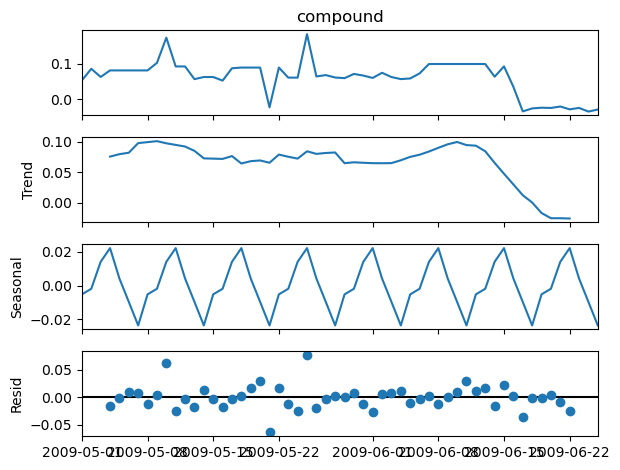

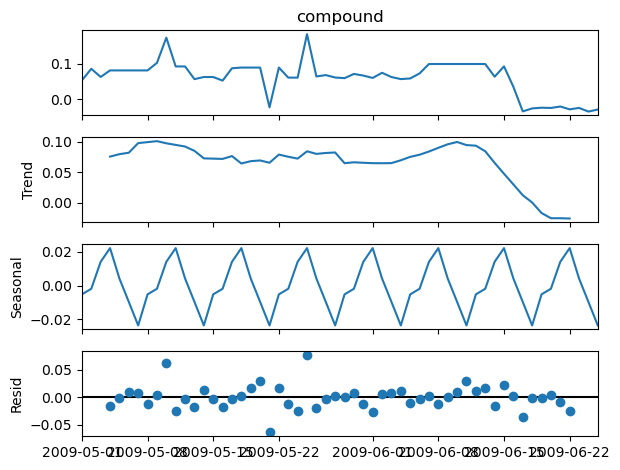

In [143]:
decomposition.plot()

In [598]:
seasonal

solo_data
2009-05-01   -0.005231
2009-05-02   -0.001914
2009-05-03    0.014131
2009-05-04    0.022277
2009-05-05    0.004178
2009-05-06   -0.009712
2009-05-07   -0.023729
2009-05-08   -0.005231
2009-05-09   -0.001914
2009-05-10    0.014131
2009-05-11    0.022277
2009-05-12    0.004178
2009-05-13   -0.009712
2009-05-14   -0.023729
2009-05-15   -0.005231
2009-05-16   -0.001914
2009-05-17    0.014131
2009-05-18    0.022277
2009-05-19    0.004178
2009-05-20   -0.009712
2009-05-21   -0.023729
2009-05-22   -0.005231
2009-05-23   -0.001914
2009-05-24    0.014131
2009-05-25    0.022277
2009-05-26    0.004178
2009-05-27   -0.009712
2009-05-28   -0.023729
2009-05-29   -0.005231
2009-05-30   -0.001914
2009-05-31    0.014131
2009-06-01    0.022277
2009-06-02    0.004178
2009-06-03   -0.009712
2009-06-04   -0.023729
2009-06-05   -0.005231
2009-06-06   -0.001914
2009-06-07    0.014131
2009-06-08    0.022277
2009-06-09    0.004178
2009-06-10   -0.009712
2009-06-11   -0.023729
2009-06-12   -0.005231
2

In [163]:
df_diff = df_concatenato['compound'].diff().dropna()

In [151]:
df_diff.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 55 entries, 2009-05-02 to 2009-06-25
Series name: compound
Non-Null Count  Dtype  
--------------  -----  
55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [152]:
from statsmodels.tsa.stattools import adfuller

# test ADF
result = adfuller(df_diff)

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

In [153]:
if p_value < 0.05:
    print("time series is stationary (Ho rejected)")
else:
    print("time series is not stationary (H1 accepted)")


time series is stationary (Ho rejected)


In [164]:
date_index = df_diff.index



In [643]:
test_set_start_index = len(df_diff) - 7

# split dataset into training and test set
train_set = df_diff.iloc[:test_set_start_index]
test_set= df_diff.iloc[test_set_start_index:]

In [644]:
test_set

solo_data
2009-06-19    0.001969
2009-06-20   -0.000683
2009-06-21    0.004045
2009-06-22   -0.007981
2009-06-23    0.004030
2009-06-24   -0.010207
2009-06-25    0.005708
Name: compound, dtype: float64

# arima

In [645]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV
from pmdarima import auto_arima


In [646]:
p_values = range(0, 3)  # Range per p
q_values = range(0, 3) 
d_values = range(0, 3)
# Range per q

In [647]:
grid_search =  auto_arima(train_set, # grid search using auto_arima
                        start_p=min(p_values),
                        start_q=min(q_values),
                        max_p=max(p_values),
                        max_q=max(q_values),
                        d=1,
                        seasonal=False,  # ARIMA non stagionale
                        stepwise=True,  # Esecuzione passo-passo
                        suppress_warnings=True,  # Nascondi avvisi
                        error_action="ignore",  # Ignora errori
                        trace=True)  # Mostra il percorso della ricerca




Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-111.269, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-136.024, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-113.266, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-156.434, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-158.247, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-138.001, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-163.194, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-164.337, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-162.698, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-163.530, Time=0.11 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total 

In [648]:
model = ARIMA(train_set, order=(2, 1, 2))


In [649]:
model_fit = model.fit()



In [650]:
predictions = model_fit.forecast(7)

In [651]:
predictions

2009-06-19   -0.007977
2009-06-20   -0.004062
2009-06-21   -0.000431
2009-06-22   -0.006450
2009-06-23   -0.001448
2009-06-24   -0.004129
2009-06-25   -0.003565
Freq: D, Name: predicted_mean, dtype: float64

In [652]:
test_set

solo_data
2009-06-19    0.001969
2009-06-20   -0.000683
2009-06-21    0.004045
2009-06-22   -0.007981
2009-06-23    0.004030
2009-06-24   -0.010207
2009-06-25    0.005708
Name: compound, dtype: float64

In [653]:
import matplotlib.pyplot as plt


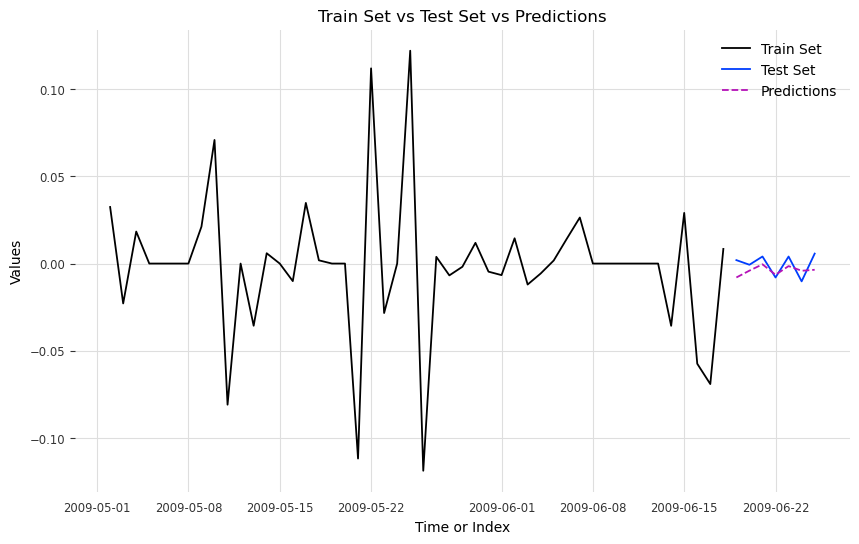

In [654]:
plt.figure(figsize=(10,6))

# plot train set vs test set and vs predicted values
plt.plot(train_set, label='Train Set')
plt.plot(test_set, label='Test Set')
plt.plot(predictions, label='Predictions', linestyle='--')

# titles and labels
plt.title('Train Set vs Test Set vs Predictions')
plt.xlabel('Time or Index')
plt.ylabel('Values')


plt.legend()
plt.show()


In [655]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set, predictions)

212.5537171929769

In [656]:
model2 = ARIMA(df_diff, order=(2, 1, 2))

In [657]:
model_fit = model2.fit()

In [658]:
one_week_forecast = model_fit.forecast(steps=7)
one_month_forecast = model_fit.forecast(steps=30)
three_months_forecast = model_fit.forecast(steps=90)

<Axes: >

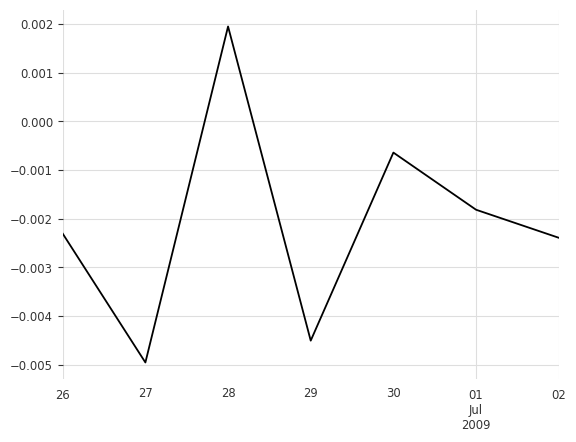

In [699]:
one_week_forecast.plot()

<Axes: >

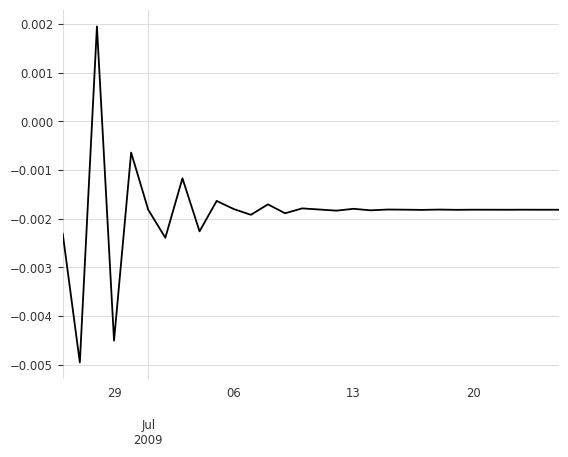

In [659]:
one_month_forecast.plot()

<Axes: >

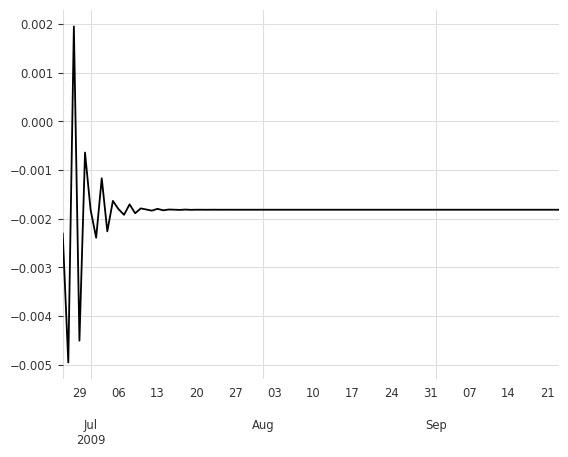

In [660]:
three_months_forecast.plot()

In [662]:
type(three_months_forecast)

pandas.core.series.Series

In [663]:
actual_predictions = three_months_forecast.values

In [666]:
df_diff= df_diff.reset_index()

In [667]:
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  55 non-null     datetime64[ns]
 1   compound   55 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1008.0 bytes


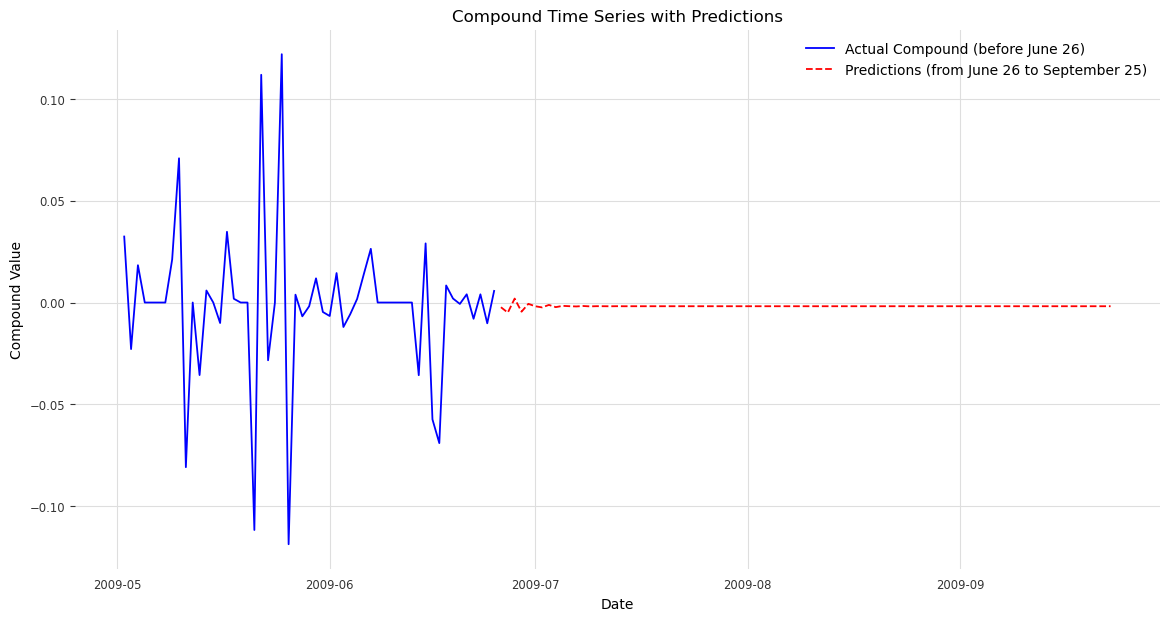

In [668]:

df_diff['solo_data'] = pd.to_datetime(df_diff['solo_data'])

prediction_dates = pd.date_range(start='2009-06-26', end='2009-09-23', freq='D')


df_before = df_diff[df_diff['solo_data'] < '2009-06-26']
df_after = df_diff[df_diff['solo_data'] >= '2009-06-26']


plt.figure(figsize=(14, 7))


plt.plot(df_before['solo_data'], df_before['compound'], label='Actual Compound (before June 26)', color='blue')


plt.plot(prediction_dates, actual_predictions, label='Predictions (from June 26 to September 25)', color='red', linestyle='--')

plt.title('Compound Time Series with Predictions')
plt.xlabel('Date')
plt.ylabel('Compound Value')
plt.legend()
plt.show()


# Exponential Smoothing

In [704]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

In [732]:
train_size = int(len(df_smooth) * 0.8)
train_data = df_concatenato[:train_size]
test_data = df_concatenato[train_size:]

In [733]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2009-05-01 to 2009-06-13
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   compound  44 non-null     float64
 1   day_num   44 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [757]:
model = ExponentialSmoothing(train_data['compound'], seasonal='add', trend='add',seasonal_periods=7)  



In [754]:
predictions = model_fit.forecast(len(test_data))



In [755]:
MAPE(predictions,test_data['compound'])

175.972378549438

In [737]:
train_data= train_data.reset_index()

In [738]:
test_data= test_data.reset_index()

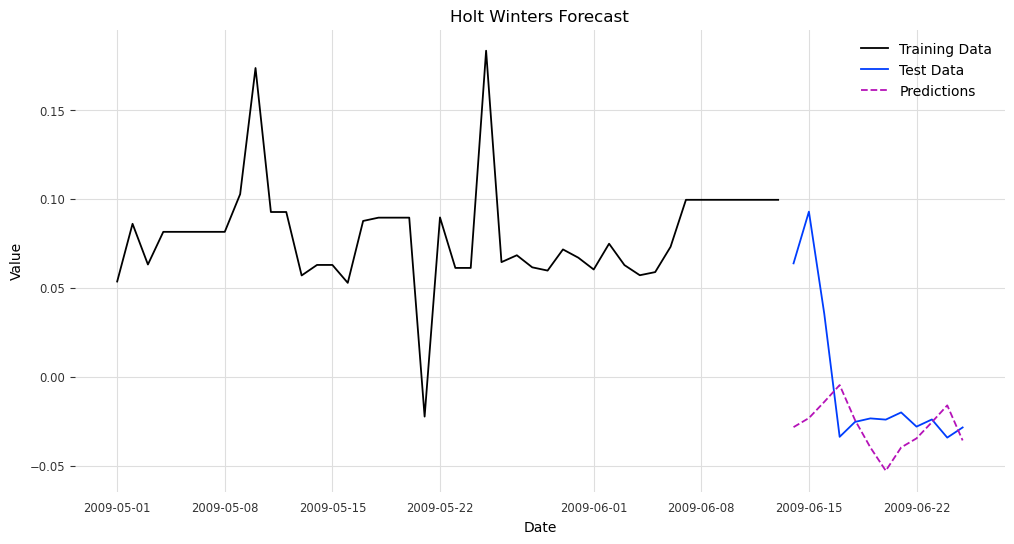

In [758]:
# Visualizza i risultati
plt.figure(figsize=(12, 6))
plt.plot(train_data['solo_data'], train_data['compound'], label='Training Data')
plt.plot(test_data['solo_data'], test_data['compound'], label='Test Data')
plt.plot(test_data['solo_data'], predictions, label='Predictions', linestyle='--')
plt.legend()
plt.title('Holt Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [744]:
model = ExponentialSmoothing(df_smooth['compound'], seasonal='add',trend = "add", seasonal_periods=7) 
model_fit = model.fit()

In [745]:
predictions = model_fit.forecast(90)

In [746]:
predictions= predictions.values

In [747]:
len(predictions)

90

In [750]:
df_smooth=df_smooth.reset_index()

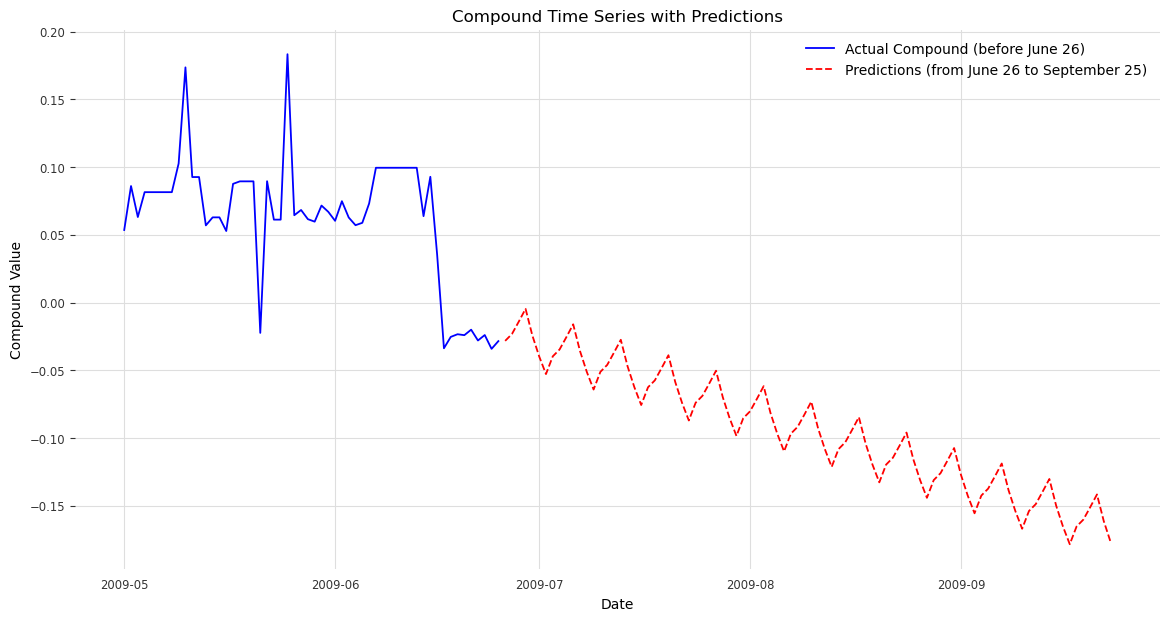

In [751]:

df_smooth['solo_data'] = pd.to_datetime(df_smooth['solo_data'])

prediction_dates = pd.date_range(start='2009-06-26', end='2009-09-23', freq='D')


df_before = df_smooth[df_smooth['solo_data'] < '2009-06-26']
df_after = df_smooth[df_smooth['solo_data'] >= '2009-06-26']


plt.figure(figsize=(14, 7))


plt.plot(df_before['solo_data'], df_before['compound'], label='Actual Compound (before June 26)', color='blue')


plt.plot(prediction_dates, predictions, label='Predictions (from June 26 to September 25)', color='red', linestyle='--')

plt.title('Compound Time Series with Predictions')
plt.xlabel('Date')
plt.ylabel('Compound Value')
plt.legend()
plt.show()


# Dashboard

In [141]:
df = df_concatenato.reset_index()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      56 non-null     int64         
 1   solo_data  56 non-null     datetime64[ns]
 2   compound   56 non-null     float64       
 3   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


In [760]:
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  55 non-null     datetime64[ns]
 1   compound   55 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1008.0 bytes


# Dashboard

In [764]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from datetime import timedelta
import dash
from dash import Dash, html, dcc, Output, Input
import plotly.express as px

In [788]:
p_app=Dash(__name__)

# app layout 
p_app.layout=html.Div([
    dcc.Graph(id="arima"),
    dcc.DatePickerRange(
        id="time",
        start_date=df_diff["solo_data"].min(), # starting date
        end_date=df_diff["solo_data"].max(),  # ending date
        display_format="YYYY-MM-DD"
    )
])

# ARIMA prediction
def prediction(df_diff, p_end_date):
    
    training_set = df_diff  

    p_end_date = pd.to_datetime(p_end_date)

    # num days for prediction
    forecast_period = (p_end_date - training_set["solo_data"].max()).days
    if forecast_period <= 0:
        return training_set

    # grid search
    grid_search = auto_arima(training_set["compound"], seasonal=False, stepwise=True,
                             suppress_warnings=True, error_action="ignore", trace=True)
    
    g_model = ARIMA(training_set["compound"], order=grid_search.order)
    g_model_fit = g_model.fit()
    forecast = g_model_fit.forecast(steps=forecast_period)

    g_future_dates=[training_set["solo_data"].max() + timedelta(days=x) for x in range(1,forecast_period + 1)]
    forecast_df=pd.DataFrame({
        "solo_data": g_future_dates,
        "compound": forecast
    })

    df_diff = pd.concat([training_set,forecast_df], ignore_index=True)
    return df_diff

# Callback 
@p_app.callback(
    Output("arima","figure"),
    [Input("time","start_date"),
     Input("time","end_date")]
)

# Graph function returning a figure
def update_graph(ug_start_date, ug_end_date):
    dff=df_diff[(df_diff["solo_data"] >= ug_start_date) & (df_diff["solo_data"] <= ug_end_date)]
    dff=prediction(dff,ug_end_date) # Call function for prediction
    
    fig=px.line(dff, x="solo_data",y="compound",title="Time series") # Graph
    
    return fig

if __name__ == "__main__":
    p_app.run_server(port=8077, debug=False)


Dash is running on http://127.0.0.1:8077/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8077
Press CTRL+C to quit
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_9_3m1684674951.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET /_dash-component-suites/dash/deps/react@16.v2_9_3m1684674951.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_9_3m1684674951.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_3m1684674951.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_9_3m1684674951.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_9_2m1684674951.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 19:26:38] "GET /_dash-component-suites/dash